# Bay Wheels's bike sharing system and its usage pattern during March 2020
## by Samrat Devkota

## Investigation Overview

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018.

## Dataset Overview

> The dataset used for the analysis consists of Bay Wheels's trip data for public use for March 2020, which can be find <a href=https://www.lyft.com/bikes/bay-wheels/system-data>here</a>.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202003-baywheels-tripdata.csv')

In [6]:
# Data cleaning

# make copy of data
df_clean = df.copy()

df_clean.dropna(inplace=True)

# convert datatype of start_time and end_time from object to datatime
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#  convert datatype of start_station_id and end_station_id to int
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int')

# convert datatype of user_type to category
df_clean['user_type'] = df_clean['user_type'].astype('category')



# Extract minute,day,week,month from the start_time
df_clean['duration_min'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

# save the cleaned data to csv file
df_clean.to_csv('baywheels_tripdata_clean.csv',index=None)

trip_master=pd.read_csv('baywheels_tripdata_clean.csv')
trip_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month
0,1772,2020-03-31 15:23:58,2020-03-31 15:53:30,473,Willow St at Blewett Ave,37.309014,-121.900011,473,Willow St at Blewett Ave,37.309014,-121.900011,480691,Subscriber,app,29.533333,2020-03-31,15,Tuesday,March
1,737,2020-03-26 16:24:05,2020-03-26 16:36:23,473,Willow St at Blewett Ave,37.309014,-121.900011,309,San Jose City Hall,37.337391,-121.886995,237580,Subscriber,app,12.283333,2020-03-26,16,Thursday,March
2,253,2020-03-15 18:51:36,2020-03-15 18:55:50,473,Willow St at Blewett Ave,37.309014,-121.900011,415,Delmas Ave at Virginia St,37.319757,-121.892999,239732,Subscriber,app,4.216667,2020-03-15,18,Sunday,March
3,169,2020-03-31 15:20:10,2020-03-31 15:23:00,473,Willow St at Blewett Ave,37.309014,-121.900011,473,Willow St at Blewett Ave,37.309014,-121.900011,439978,Subscriber,app,2.816667,2020-03-31,15,Tuesday,March
4,623,2020-03-07 18:31:26,2020-03-07 18:41:50,473,Willow St at Blewett Ave,37.309014,-121.900011,406,Parkmoor Ave at Race St,37.316736,-121.910005,168502,Subscriber,app,10.383333,2020-03-07,18,Saturday,March


# Motivation

## Is there any difference between different user types and different access methods during weekdays and hours?

# Research questions

**Q1: How does the average trip duration vary during a week between customers and subscribers?**

**Q2: How does the average trip duration vary during a week between different access methods?**

**Q3: How does the hourly usage vary during a week for customers and subscribers?**

**Q4: How does the hourly usage vary during a week for app and cleaper access methods?**

# Background

* The main user type is subscribers 
* Users mostly use app to access

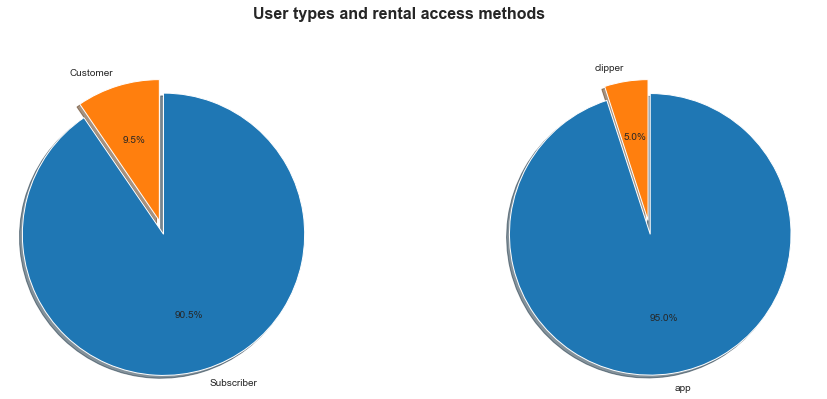

In [7]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.suptitle('User types and rental access methods', fontsize=16, fontweight='semibold', y=1.015);
plt.subplot(1, 2, 1);
sorted_vals = trip_master.user_type.value_counts()/trip_master.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
sorted_vals = trip_master.rental_access_method.value_counts()/trip_master.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

### Q1: How does the average trip duration vary during a week between customers and subscribers?

* Trip duration for customers is larger than for subscribers
* It is clear that subscribers spend less time in a trip than customers
* Both of the user types have an increasing trend for the average time for a trip by the end of a week

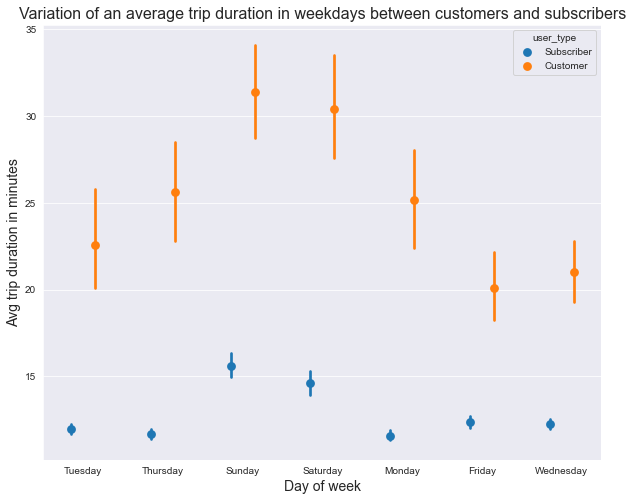

In [8]:
# Visualization
plt.figure(figsize=[10, 8]);
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between customers and subscribers", fontsize=16);

### Q2: How does the average trip duration vary during a week between different access methods?

* Overall, users accessed by the app tend to spend more time in a trip
* It is clear that the trend for both accessing methods is increasing by the end of a week

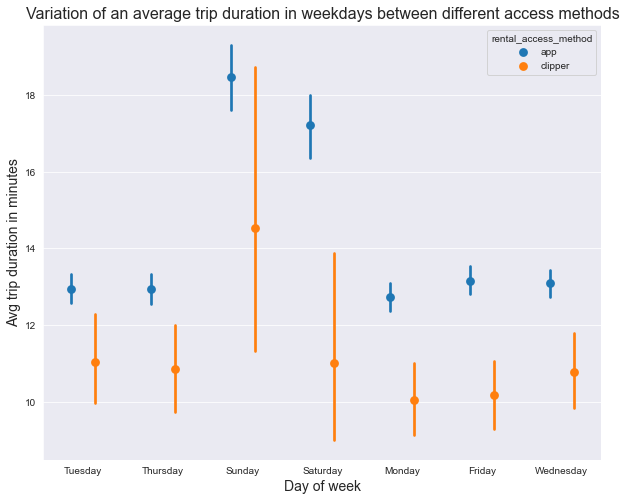

In [9]:
# Visualization
plt.figure(figsize=[10, 8]);
sb.pointplot(data=trip_master, x='start_day_of_week', y='duration_min', hue='rental_access_method', dodge=0.3, linestyles="")
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Avg trip duration in minutes', fontsize=14)
plt.title("Variation of an average trip duration in weekdays between different access methods", fontsize=16);

## Q3: How does the hourly usage vary during a week for customers and subscribers?

- It is interesting, that customers tend to use the bike service mostly on Sunday from 12 PM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).

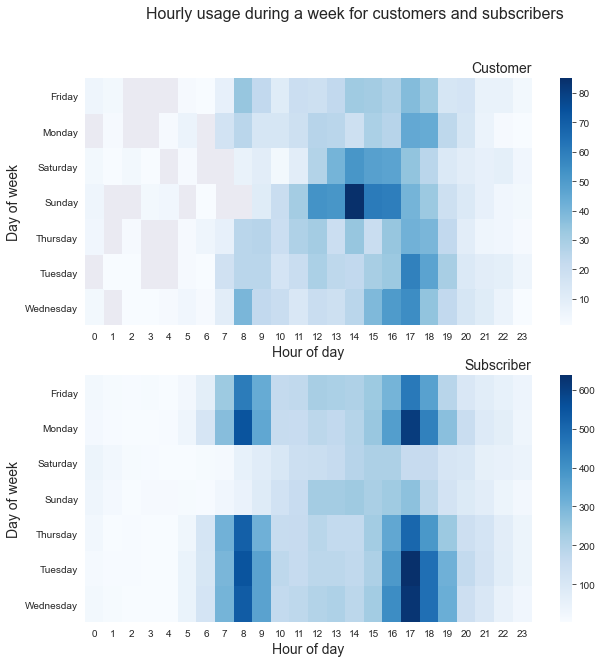

In [10]:
# Visualization
plt.figure(figsize=[10, 10]);
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

## Q4: How does the hourly usage vary during a week for app and cleaper access methods?

* The access methods do not have a significant influence on a day and time of usage the service. However, if we get more data on clipper access method, the pattern may change
* As it was shown before, there is a lack of data on clipper usage type, which can be associated with some technical specifications/conditions of the service

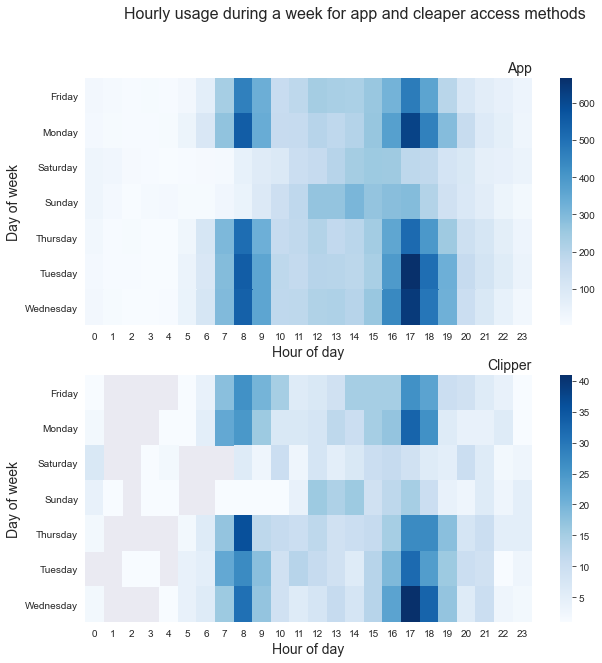

In [11]:
# Visualization
plt.figure(figsize=[10, 10]);
plt.suptitle('Hourly usage during a week for app and cleaper access methods', fontsize=16)

plt.subplot(2, 1, 1)
customers = trip_master.query('rental_access_method == "app"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('App', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = trip_master.query('rental_access_method == "clipper"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Clipper', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

# Conclusion

* There is a difference in usage patterns by day of week and hours for customers and subscribers
* The access methods do not have a significant influence on a day and time of usage